In [6]:
import pandas as pd
import re
import nltk
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
data = pd.read_csv('../DATA/data.csv')

# Assume text is in the first column
texts = data.iloc[:, 0].astype(str)

# Function to preprocess text
def preprocess_text(text, stem=False, lemma=False):
    # Lowercase and remove punctuation
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming
    if stem:
        ps = PorterStemmer()
        tokens = [ps.stem(word) for word in tokens]
    
    # Lemmatization
    if lemma:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Apply preprocessing for different stages
texts_clean = texts.apply(lambda x: preprocess_text(x))
texts_stem = texts.apply(lambda x: preprocess_text(x, stem=True))
texts_lemmatized = texts.apply(lambda x: preprocess_text(x, lemma=True))

# Function to plot term frequency
def plot_term_frequency(texts, title, ngram_range=(1,1), top_n=20):
    vectorizer = TfidfVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(texts)
    terms = vectorizer.get_feature_names_out()
    freqs = X.sum(axis=0).A1
    term_freq = pd.DataFrame({'term': terms, 'frequency': freqs})
    top_terms = term_freq.nlargest(top_n, 'frequency')
    
    # Plot using Plotly
    fig = px.bar(top_terms, x='term', y='frequency', title=title)
    fig.show()



[nltk_data] Downloading package punkt to /home/alex/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/alex/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
# Plot term frequencies for tokenized/clean, stemming, lemmatized
plot_term_frequency(texts_clean, 'Term Frequency: Tokenized/Cleaned')
plot_term_frequency(texts_stem, 'Term Frequency: Tokenized/Stemmed')
plot_term_frequency(texts_lemmatized, 'Term Frequency: Tokenized/Lemmatized')



In [8]:
# Generate TF-IDF for different n-grams
plot_term_frequency(texts_clean, 'TF-IDF Unigrams (1,1)', ngram_range=(1,1))
plot_term_frequency(texts_clean, 'TF-IDF Unigrams and Bigrams (1,2)', ngram_range=(1,2))
plot_term_frequency(texts_clean, 'TF-IDF Bigrams (2,2)', ngram_range=(2,2))
plot_term_frequency(texts_clean, 'TF-IDF Bigrams and Trigrams (2,3)', ngram_range=(2,3))



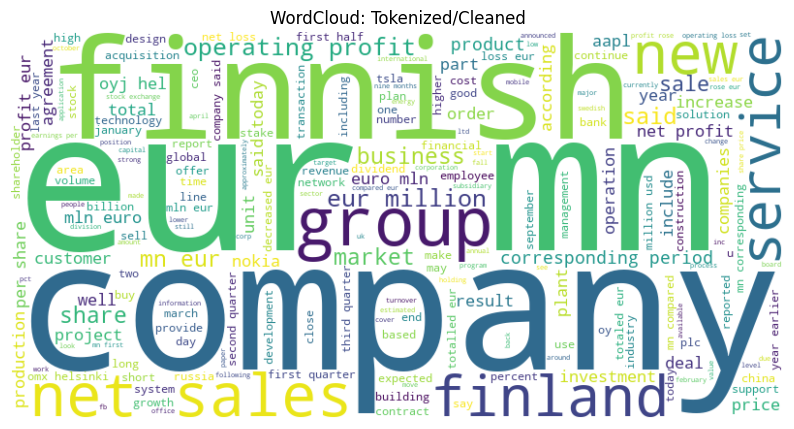

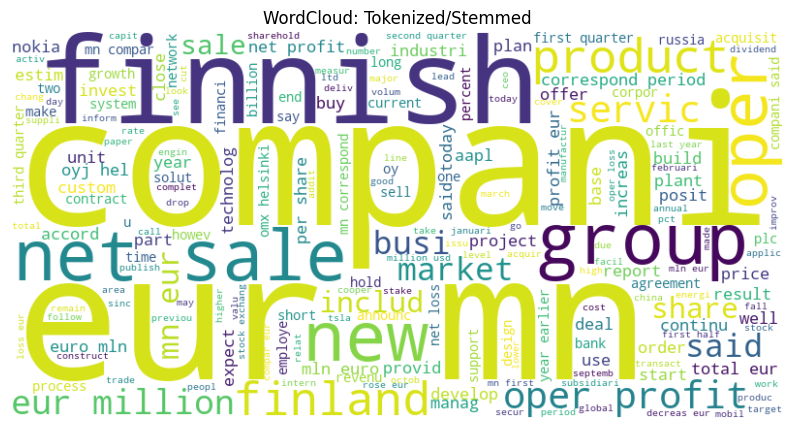

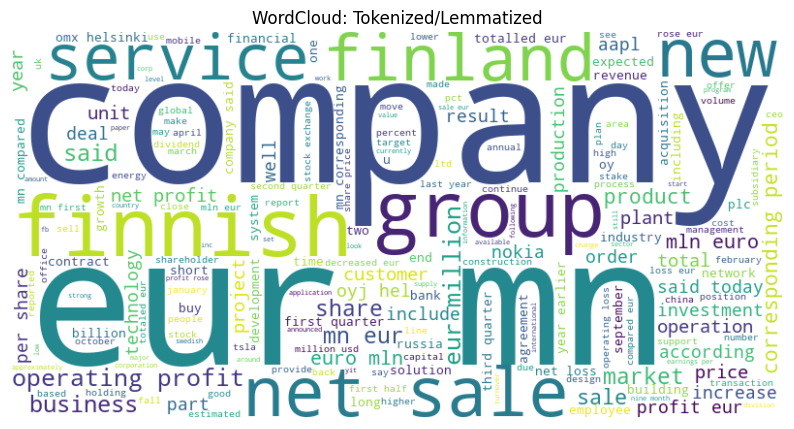

In [9]:
# Function to generate wordcloud
def generate_wordcloud(texts, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(texts))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate wordclouds
generate_wordcloud(texts_clean, 'WordCloud: Tokenized/Cleaned')
generate_wordcloud(texts_stem, 'WordCloud: Tokenized/Stemmed')
generate_wordcloud(texts_lemmatized, 'WordCloud: Tokenized/Lemmatized')



In [10]:
# Function to compare L1 and L2 normalization
def compare_l1_l2(texts, ngram_range=(1,1)):
    vectorizer_l1 = TfidfVectorizer(norm='l1', ngram_range=ngram_range)
    vectorizer_l2 = TfidfVectorizer(norm='l2', ngram_range=ngram_range)
    X_l1 = vectorizer_l1.fit_transform(texts)
    X_l2 = vectorizer_l2.fit_transform(texts)
    
    norm_l1 = X_l1.sum(axis=1).A1.mean()
    norm_l2 = (X_l2.multiply(X_l2)).sum(axis=1).A1.mean()
    
    print(f"Mean L1 norm: {norm_l1}")
    print(f"Mean L2 norm: {norm_l2}")

# Compare L1 and L2 for different n-gram ranges
compare_l1_l2(texts_clean, ngram_range=(1,1))
compare_l1_l2(texts_clean, ngram_range=(1,2))
compare_l1_l2(texts_clean, ngram_range=(2,2))
compare_l1_l2(texts_clean, ngram_range=(2,3))


Mean L1 norm: 0.999828825744608
Mean L2 norm: 0.999828825744608
Mean L1 norm: 0.999828825744608
Mean L2 norm: 0.999828825744608
Mean L1 norm: 0.9989729544676481
Mean L2 norm: 0.9989729544676481
Mean L1 norm: 0.9989729544676481
Mean L2 norm: 0.9989729544676481


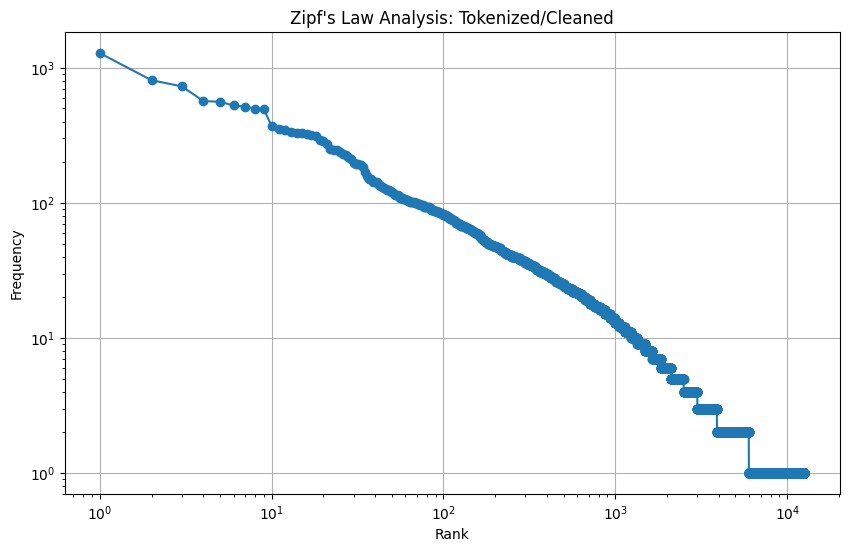

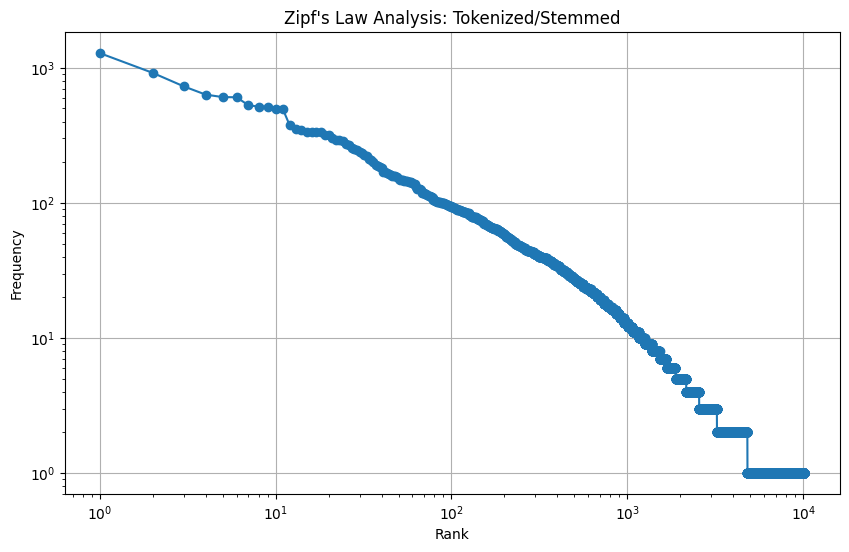

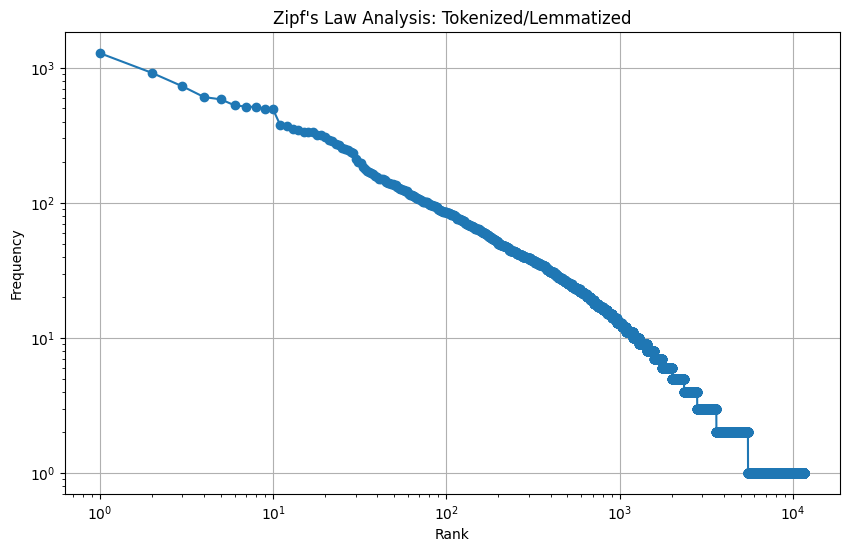

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Function to perform Zipf's Law analysis
def plot_zipf_law(texts, title):
    # Tokenize the texts and count word frequencies
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(texts)
    word_freq = np.asarray(X.sum(axis=0)).flatten()
    
    # Sort frequencies in descending order
    sorted_freq = np.sort(word_freq)[::-1]
    
    # Rank (position of each frequency)
    ranks = np.arange(1, len(sorted_freq) + 1)
    
    # Plot Zipf's Law
    plt.figure(figsize=(10, 6))
    plt.plot(ranks, sorted_freq, marker="o")
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f"Zipf's Law Analysis: {title}")
    plt.xlabel("Rank")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# Perform Zipf's Law analysis for the three versions
plot_zipf_law(texts_clean, "Tokenized/Cleaned")
plot_zipf_law(texts_stem, "Tokenized/Stemmed")
plot_zipf_law(texts_lemmatized, "Tokenized/Lemmatized")


In [17]:
# Separar dados em positivos e negativos
positive_texts = data[data['Sentiment'] == 'positive']['Sentence'].astype(str)
negative_texts = data[data['Sentiment'] == 'negative']['Sentence'].astype(str)
neutral_texts  = data[data['Sentiment'] == 'neutral']['Sentence'].astype(str)

# Função para pré-processamento (sem mudanças)
def preprocess_text(text, stem=False, lemma=False):
    text = re.sub(r'[^\w\s]', '', text.lower())
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    if stem:
        ps = PorterStemmer()
        tokens = [ps.stem(word) for word in tokens]
    
    if lemma:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Aplicar o pré-processamento
positive_clean = positive_texts.apply(lambda x: preprocess_text(x))
positive_stem = positive_texts.apply(lambda x: preprocess_text(x, stem=True))
positive_lemma = positive_texts.apply(lambda x: preprocess_text(x, lemma=True))

negative_clean = negative_texts.apply(lambda x: preprocess_text(x))
negative_stem = negative_texts.apply(lambda x: preprocess_text(x, stem=True))
negative_lemma = negative_texts.apply(lambda x: preprocess_text(x, lemma=True))

neutral_clean = neutral_texts.apply(lambda x: preprocess_text(x))
neutral_stem  = neutral_texts.apply(lambda x: preprocess_text(x, stem=True))
neutral_lemma = neutral_texts.apply(lambda x: preprocess_text(x, lemma=True))



In [20]:
# Reutilizar as funções para análise Zipf, TF-IDF, Wordcloud e Normalização para ambos os conjuntos
# Exemplo para o conjunto positivo:

# Exemplo: Plot Zipf Law para textos positivos
# plot_zipf_law(positive_clean, "Positive - Tokenized/Cleaned")
# plot_zipf_law(positive_stem, "Positive - Tokenized/Stemmed")
# plot_zipf_law(positive_lemma, "Positive - Tokenized/Lemmatized")

# Exemplo: TF-IDF e N-grams para textos positivos
plot_term_frequency(positive_clean, 'TF-IDF Unigrams (1,1) - Positive', ngram_range=(1,1))
plot_term_frequency(positive_clean, 'TF-IDF Unigrams and Bigrams (1,2) - Positive', ngram_range=(1,2))

# Repetir para o conjunto negativo:
# plot_zipf_law(negative_clean, "Negative - Tokenized/Cleaned")
# plot_zipf_law(negative_stem, "Negative - Tokenized/Stemmed")
# plot_zipf_law(negative_lemma, "Negative - Tokenized/Lemmatized")

plot_term_frequency(negative_clean, 'TF-IDF Unigrams (1,1) - Negative', ngram_range=(1,1))
plot_term_frequency(negative_clean, 'TF-IDF Unigrams and Bigrams (1,2) - Negative', ngram_range=(1,2))

# Repetir para o conjunto negativo:
# plot_zipf_law(neutral_clean, "Negative - Tokenized/Cleaned")
# plot_zipf_law(neutral_stem, "Negative - Tokenized/Stemmed")
# plot_zipf_law(neutral_lemma, "Negative - Tokenized/Lemmatized")

plot_term_frequency(neutral_clean, 'TF-IDF Unigrams (1,1) - Neutral', ngram_range=(1,1))
plot_term_frequency(neutral_clean, 'TF-IDF Unigrams and Bigrams (1,2) - Neutral', ngram_range=(1,2))

# # Comparar Normalizações L1 e L2 para textos positivos e negativos:
# compare_l1_l2(neutral_clean, ngram_range=(1,1))
# compare_l1_l2(neutral_clean, ngram_range=(1,1))


In [24]:
import plotly.express as px
import pandas as pd

# Função para realizar a análise da Lei de Zipf com Plotly, exibindo os termos
def plot_zipf_law_with_terms_plotly(texts, title):
    # Tokenizar os textos e contar a frequência das palavras
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(texts)
    word_freq = np.asarray(X.sum(axis=0)).flatten()
    
    # Obter os termos correspondentes
    terms = vectorizer.get_feature_names_out()
    
    # Organizar as frequências e termos em ordem decrescente
    sorted_indices = np.argsort(word_freq)[::-1]
    sorted_freq = word_freq[sorted_indices]
    sorted_terms = np.array(terms)[sorted_indices]
    
    # Rank (posição de cada frequência)
    ranks = np.arange(1, len(sorted_freq) + 1)
    
    # Criar um DataFrame para o gráfico
    df = pd.DataFrame({
        'Rank': ranks,
        'Frequency': sorted_freq,
        'Term': sorted_terms
    })
    
    # Criar o gráfico interativo com Plotly
    fig = px.line(df, x='Rank', y='Frequency', hover_name='Term', title=f"Zipf's Law Analysis with Terms: {title}",
                  log_x=True, log_y=True)
    
    # Adicionar marcas para facilitar a visualização
    fig.update_traces(mode='markers+lines')
    
    # Exibir o gráfico
    fig.show()

# Aplicar a função para os conjuntos de dados positivos e negativos
plot_zipf_law_with_terms_plotly(positive_clean, "Positive - Tokenized/Cleaned")
plot_zipf_law_with_terms_plotly(positive_stem, "Positive - Tokenized/Stemmed")
plot_zipf_law_with_terms_plotly(positive_lemma, "Positive - Tokenized/Lemmatized")

plot_zipf_law_with_terms_plotly(negative_clean, "Negative - Tokenized/Cleaned")
plot_zipf_law_with_terms_plotly(negative_stem, "Negative - Tokenized/Stemmed")
plot_zipf_law_with_terms_plotly(negative_lemma, "Negative - Tokenized/Lemmatized")


plot_zipf_law_with_terms_plotly(neutral_clean, "Neutral - Tokenized/Cleaned")
plot_zipf_law_with_terms_plotly(neutral_clean, "Neutral - Tokenized/Stemmed")
plot_zipf_law_with_terms_plotly(neutral_clean, "Neutral - Tokenized/Lemmatized")


In [27]:
import plotly.graph_objects as go

# Função para calcular o tamanho médio e máximo de termos e caracteres
def calculate_size_stats(texts):
    num_terms = texts.apply(lambda x: len(nltk.word_tokenize(x)))
    num_chars = texts.apply(len)
    
    avg_terms = num_terms.mean()
    max_terms = num_terms.max()
    
    avg_chars = num_chars.mean()
    max_chars = num_chars.max()
    
    return avg_terms, max_terms, avg_chars, max_chars

# Calcular para o dataset completo
avg_terms_all, max_terms_all, avg_chars_all, max_chars_all = calculate_size_stats(texts_clean)

# Calcular para sentenças positivas, negativas e neutras
avg_terms_pos, max_terms_pos, avg_chars_pos, max_chars_pos = calculate_size_stats(positive_texts)
avg_terms_neg, max_terms_neg, avg_chars_neg, max_chars_neg = calculate_size_stats(negative_texts)
# neutral_texts = data[data['category'] == 0]['clean_text'].astype(str)
avg_terms_neu, max_terms_neu, avg_chars_neu, max_chars_neu = calculate_size_stats(neutral_texts)

# Organizar os dados para o gráfico
categories = ['All', 'Positive', 'Negative', 'Neutral']
avg_terms = [avg_terms_all, avg_terms_pos, avg_terms_neg, avg_terms_neu]
max_terms = [max_terms_all, max_terms_pos, max_terms_neg, max_terms_neu]
avg_chars = [avg_chars_all, avg_chars_pos, avg_chars_neg, avg_chars_neu]
max_chars = [max_chars_all, max_chars_pos, max_chars_neg, max_chars_neu]

# Criar gráfico usando Plotly
fig = go.Figure()

# Adicionar trace para termos
fig.add_trace(go.Bar(name='Average Terms', x=categories, y=avg_terms, marker_color='blue'))
fig.add_trace(go.Bar(name='Max Terms', x=categories, y=max_terms, marker_color='lightblue'))

# Adicionar trace para caracteres
fig.add_trace(go.Bar(name='Average Characters', x=categories, y=avg_chars, marker_color='green'))
fig.add_trace(go.Bar(name='Max Characters', x=categories, y=max_chars, marker_color='lightgreen'))

# Atualizar layout
fig.update_layout(barmode='group', title='Average and Max Number of Terms and Characters by Category',
                  xaxis_title='Category', yaxis_title='Count')

# Exibir gráfico
fig.show()
